In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib import cm

from wout_plot_flux_surface import *

## Read VMEC

In [2]:
device = "TJ-II"         #Device name
VMEC_files = "wout_files" #Folder name where the wout files are

Reads wout file and gets the values for
<br>
* rmnc = Fourier coefficients for the radial values
* zmnc = Fourier coefficients for the z values
* bmnc = Fourier coefficients for the magnetic field
* itor = toroidal modes
* ipol = poloidal modes
* n_surf = number of surfaces
* n_imode = number of modes 

In [3]:
wout_file = netcdf.netcdf_file(f"{VMEC_files}/wout_tj2curref.nc", 'r')
rmnc, zmns, bmnc, itor, ipol, n_surf, n_imode = get_Values(wout_file)

In [4]:
resolution = 100 #defines (phi,theta) resolution
surface = 50    #defines magnetic surface (goes from 0 to 101)

In [5]:
Folder_Save(device)

## Compute (R,Z); B and convert to Cartesian Coordinates

In [6]:
R,Z,B = Magnetic_Surface_Matrix(rmnc, zmns, bmnc, ipol, itor, n_imode,resolution,surface, n_surf)
X,Y = Cartesian_Coordinates_Change(R,Z,resolution,n_surf)

## Plot Magnetic Surface

In [8]:
%matplotlib notebook
fig = go.Figure(data=[go.Surface(z=Z[surface,:,:], x=X[surface,:,:], y=Y[surface,:,:], 
                                 showscale=False)])

fig.update_layout(autosize=True,
                  scene=dict(
                         zaxis = dict(range = [-1.5,1.5]), 
                         xaxis = dict(range = [-2,2]),
                         yaxis = dict(range = [-2,2]) ))

config = {
    'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': f'{device}_device',
    'height': 1000,
    'width': 800,
    'scale':6 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

fig.show()

In [9]:
#Save image in {device} folder
fig.write_image(f"{device}/{device}_device.png",height=700,width=800,scale=5)
fig.write_html(f"{device}/{device}_device.html")

Compute matrices for poloidal proyection

In [9]:
phi_angle = 0  #Not the phi angle yet
R,Z = Poloidal_Proyection(rmnc, zmns, ipol, itor, n_imode, resolution, phi_angle, n_surf)
X,Y = Cartesian_Coordinates_Change(R,Z,resolution,n_surf)

## Plot Poloidal Proyection

<IPython.core.display.Javascript object>


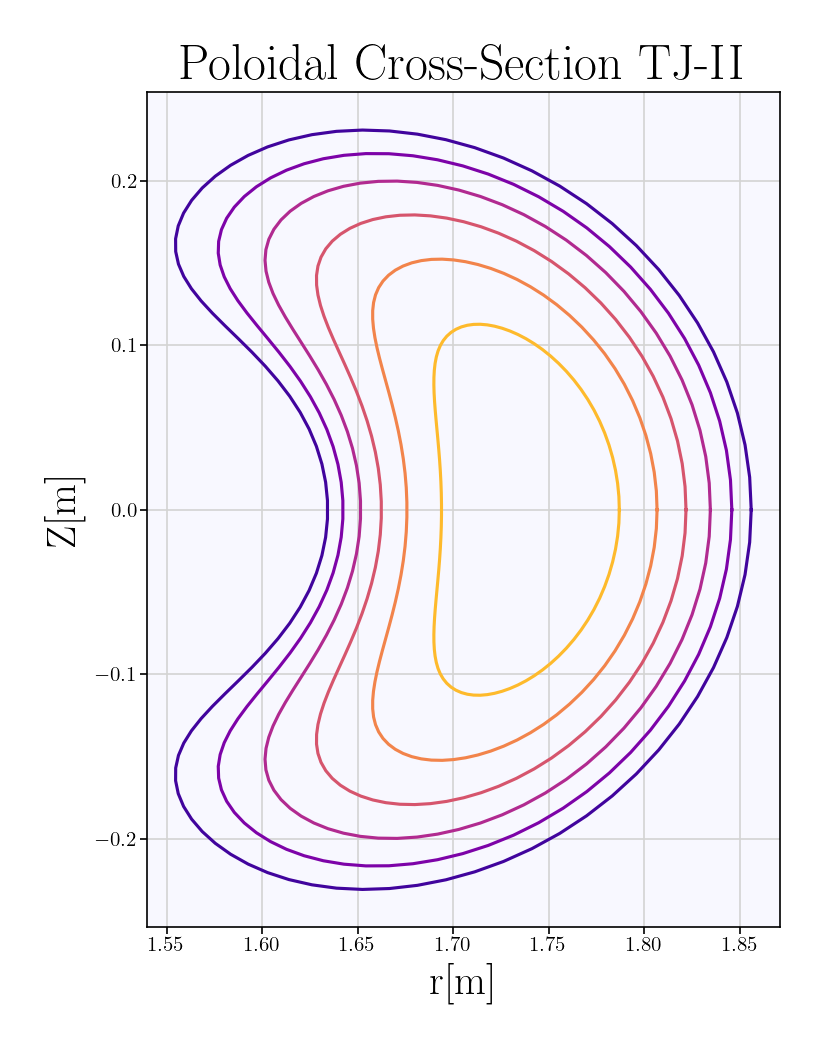

In [10]:
%matplotlib notebook

fig = plt.figure(figsize=(5.5,7))
ax = fig.add_subplot(111)

# Create a colormap
cmap = cm.get_cmap('plasma_r')

# Plot the lines with varying colors
for i in range(0,n_surf,15):
    color = cmap(i/(100))  # Normalize i to [0, 1]
    ax.plot(X[i,phi_angle,:],Z[i,phi_angle,:],color=color,linewidth=1.5,linestyle="-")

ax.set_xlabel(f'r[m]')
ax.set_ylabel(f'Z[m]')
ax.set_title(f"Poloidal Cross-Section {device}")
ax.set_facecolor('ghostwhite')

ax.xaxis.set_tick_params(labelsize=10,pad=1)
ax.yaxis.set_tick_params(labelsize=10,pad=1)
plt.show()

In [9]:
plt.savefig(f"{device}/Poloidal_CS_{phi_angle}_device_{device}.png",dpi=500)